# Fitzhugh-Nagumo simplified action-potential model

This example shows how the [Fitzhugh-Nagumo simplified action potential (AP) model](http://www.scholarpedia.org/article/FitzHugh-Nagumo_model) can be used.

The model is based on a simplification and state-reduction of the original squid axon model by Hodgkind and Huxley.
It has two state variables, a voltage-like variable and a recovery variable.


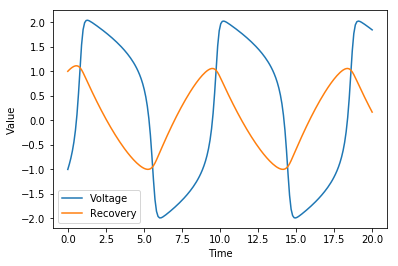

In [5]:
import pints
import pints.toy
import numpy as np
import matplotlib.pyplot as plt

# Create a model
model = pints.toy.FitzhughNagumoModel()

# Run a simulation
parameters = [0.1, 0.1, 3]
times = np.linspace(0, 20, 200)
values = model.simulate(parameters, times)

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(times, values)
plt.legend(['Voltage', 'Recovery'])
plt.show()

With these parameters, the model creates wide AP waveforms that are more reminiscent of muscle cells than neurons.

We now set up a simple optimisation problem with the model.

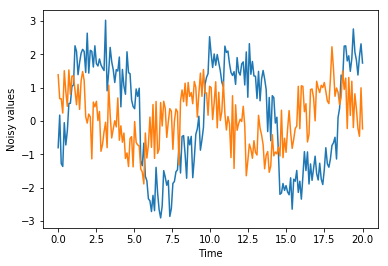

In [2]:
# First add some noise
sigma = 0.5
noisy = values + np.random.normal(0, sigma, values.shape)

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Noisy values')
plt.plot(times, noisy)
plt.show()

Next, we set up a problem. Because this model has multiple outputs (2), we use a [MultiSeriesProblem](http://pints.readthedocs.io/en/latest/core_classes_and_methods.html#multi-series-problem).

In [3]:
problem = pints.MultiSeriesProblem(model, times, noisy)
score = pints.SumOfSquaresError(problem)

Finally, we choose a wide set of boundaries and run!

Minimising error measure
using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 7
Iter. Eval. Best      Time m:s
0     7      836.4137   0:00.1
1     14     710.13     0:00.1
2     21     297.9632   0:00.1
3     28     297.9632   0:00.2
20    147    107.0678   0:00.9
40    287    104.8035   0:02.2
60    427    104.8012   0:03.5
80    567    104.8012   0:04.8
100   707    104.8012   0:06.1
120   847    104.8012   0:07.5
140   987    104.8012   0:08.8
160   1127   104.8012   0:10.1
180   1267   104.8012   0:11.3
200   1407   104.8012   0:12.7
220   1547   104.8012   0:14.0
240   1687   104.8012   0:15.4
260   1827   104.8012   0:16.8
280   1967   104.8012   0:18.1
300   2107   104.8012   0:19.4
320   2247   104.8012   0:20.7
325   2275   104.8012   0:20.9
Halting: No significant change for 200 iterations.
Score at true solution:
105.000729192
Found solution:          True parameters:
 1.07049803282111750e-01     1.00000000000000006e-01

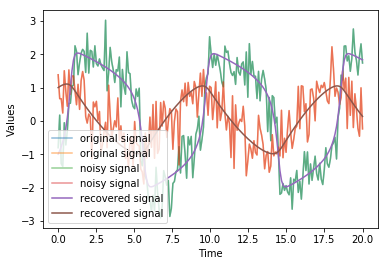

In [6]:
# Select boundaries
boundaries = pints.Boundaries([0., 0., 0.], [10., 10., 10.])

# Select a starting point
x0 = [1, 1, 1]

# Perform an optimization
found_parameters, found_value = pints.optimise(score, x0, boundaries=boundaries)

print('Score at true solution:')
print(score(parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(parameters[k]))

# Plot the results
plt.figure()
plt.xlabel('Time')
plt.ylabel('Values')
plt.plot(times, noisy, alpha=0.5, label='original signal')
plt.plot(times, noisy, alpha=0.5, label='noisy signal')
plt.plot(times, problem.evaluate(found_parameters), label='recovered signal')
plt.legend()
plt.show()